In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''

'''V2 works on X1 dataset only'''

In [33]:


#Call data

from aflow import *

result = search(batch_size=20
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 1)

#part = result[0:1000]

#len(part)
print(result[0].Egap)
#for entry in result[0:5]:
    #print(entry.Egap)

1.0032


In [34]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num = []

for i in result[0:6]:
    ele = (i.species[0])
    z= ele.replace('\n','')
    number= element(z).atomic_number
    #print(number)
    at_num.append(number)
    
#print(at_num)

x1= np.asarray(at_num).reshape(-1,1)


In [35]:
print(x1)

[[34]
 [ 9]
 [14]
 [14]
 [ 8]
 [ 8]]


In [36]:


#Define X and Y

   #entry.species, entry.geometry, entry.positions_fractional
    

Y=[]

X1= x1         #at_num
print(X1)
    
for entry in result[0:6]:
    X2= entry.positions_fractional
    
    X3= entry. geometry
    print(X3)
    
    
    
    
for entry in result[0:6]:
    BG= entry.Egap
    Y.append(BG)
    #print(Y)
print(Y)

[[34]
 [ 9]
 [14]
 [14]
 [ 8]
 [ 8]]
[  4.523779   4.523779   5.049212  90.        90.       120.      ]
[  3.546542   3.546542   3.910963  90.        90.       120.      ]
[ 10.21488  10.21495  10.38431  90.       90.      119.9998 ]
[ 10.8115  10.8115  10.8115 109.4712 109.4712 109.4712]
[ 6.934511  7.59636   7.826332 89.9968   90.       90.      ]
[  5.171968   5.171968   7.033757  90.        90.       136.9788  ]
[1.0032, 1.0066, 1.1182, 1.1937, 1.1997, 1.2933]


In [37]:
#Split the data

from sklearn.cross_validation import train_test_split


#X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, random_state=10)

X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, Y_train, Y_test = train_test_split(X1, X2, X3, Y, random_state=10)

In [60]:
#implement KNeighborsRegressor---choose estimator

rad = 2


from sklearn.neighbors import RadiusNeighborsRegressor
estimator = RadiusNeighborsRegressor(rad, weights='distance', p=2)

In [64]:
#train data

#X2_train, X3_train,

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X1_train,  Y_train)
y_predicted = estimator.predict(X1_test)

#test the accuracy
accuracy = np.mean(Y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))



The accuracy is 0.0%


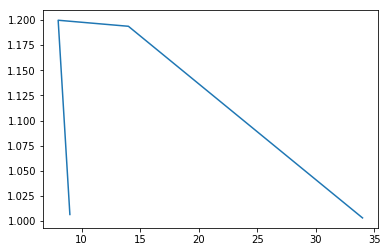

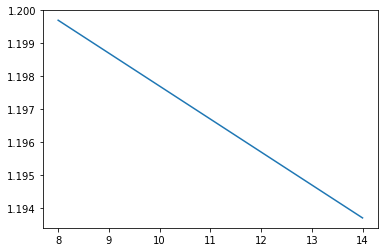

In [65]:
#Test the model

plt.plot(X1_train, Y_train)
plt.show()
plt.plot(X1_test, y_predicted)
plt.show()